In [ ]:
!wget https://perso.esiee.fr/~gueurett/LV_Research/Acoustic_Analysis_Results.csv

---
---
# **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras import layers, initializers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

KeyboardInterrupt: ignored

In [ ]:
data = pd.read_csv('Acoustic_Analysis_Results.csv', delimiter=',', dtype=None, encoding=None)
data = data.rename(columns={'Unnamed: 0': 'Filename'}) # rename the not-named column to the filename column
labels = np.zeros(shape=(data.shape[0],))
for index, filename in enumerate(data['Filename']):
  if filename[0] == 'O':
    labels[index] = 1
data = data.drop(columns=['Filename'])
data = data.fillna(data.mean())
for column_name in data.columns:
  data[column_name] = (data[column_name] - np.mean(data[column_name])) / np.std(data[column_name])

data = data.to_numpy()

nb_features = data.shape[1]
nb_samples  = data.shape[0]

rng     = np.random.default_rng() # shuffle time
shuffle = rng.choice(nb_samples, size=(nb_samples), replace=False)
data    = data[shuffle]
labels  = labels[shuffle]

print("-----------------------------")
print("|  data.shape:   ", data.shape, "|")
print("|  labels.shape: ", labels.shape, "   |")
print("-----------------------------")

-----------------------------
|  data.shape:    (200, 35) |
|  labels.shape:  (200,)    |
-----------------------------


In [ ]:
spliter = 0.2
index = int(nb_samples * (1-spliter))

train_x = data[:index]
test_x  = data[index:]

train_y = labels[:index]
test_y  = labels[index:]

print("----------------------------------")
print("| train_x.shape: ", train_x.shape)
print("| train_y.shape : ", train_y.shape)
print("----------------------------------")
print("| test_x.shape: ", test_x.shape)
print("| test_y.shape : ", test_y.shape)
print("----------------------------------")

----------------------------------
| train_x.shape:  (160, 35)
| train_y.shape :  (160,)
----------------------------------
| test_x.shape:  (40, 35)
| test_y.shape :  (40,)
----------------------------------


---
---
# **Linear Regression**

-0.04472505361883883
[-0.27905182 -0.01999998  0.23633188 -0.08734708 -0.00436082 -1.49387573
  1.48461184  0.03339797  0.19856777  0.09486456 -0.0533511  -0.12973305
  0.04696578 -0.02427254  0.18780058 -0.21213057  0.0364211   0.11718548
 -0.05962474  0.00707669  0.07871099 -0.05830073 -0.04821516  0.09514484
  0.01724227  0.02170498 -0.02319051  0.00313454  0.11779949 -0.0409837
  0.03718547  0.05917628 -0.02309964 -0.00592021  0.113782  ]


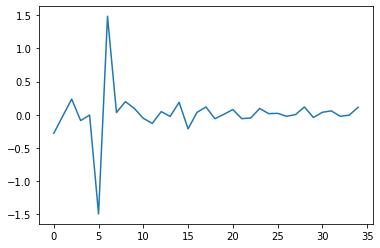

In [ ]:
linreg = LinearRegression()

linreg.fit(train_x, train_y)
print(linreg.score(test_x, test_y))

print(linreg.coef_)
plt.plot(linreg.coef_);

---
---
# **SVM**

0.65
[[-1.27216057 -0.75546626  0.47252024  0.66791502  0.12800833 -0.50170202
   0.16185912  0.24193351  1.74939499 -0.0264177   0.13495742 -0.86984767
   0.21293539  0.58022339  0.26933597 -1.12397437  0.10032368  0.61588236
  -0.34952158 -0.2627437   0.54301683 -0.20433998 -0.43317576  0.63580126
   0.16284709  0.32827047 -0.27426672  0.09586253  0.75637655 -0.04621249
   0.11629876  0.29438093 -0.14473004  0.19558376  0.87355493]]


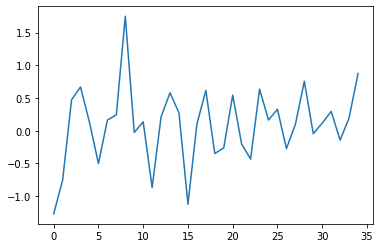

In [ ]:
svm = SVC(kernel='linear')
svm.fit(train_x, train_y)

print(svm.score(test_x, test_y))
print(svm.coef_)
plt.plot(svm.coef_[0])

---
---
# **AdaBoost**

0.7
[0.03 0.01 0.   0.   0.01 0.01 0.   0.03 0.08 0.05 0.01 0.   0.06 0.01
 0.   0.03 0.01 0.04 0.05 0.   0.03 0.02 0.04 0.11 0.   0.   0.   0.06
 0.05 0.08 0.03 0.02 0.06 0.05 0.02]


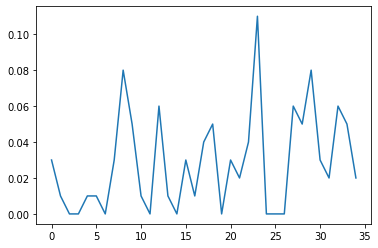

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=8)
ada.fit(train_x, train_y)

print(ada.score(test_x, test_y))

print(ada.feature_importances_)
plt.plot(ada.feature_importances_)

---
---
# **RandomForestClassifier**

0.76
[0.03682159 0.02999737 0.02358026 0.02741215 0.01840299 0.02523363
 0.02464684 0.02631124 0.03367045 0.03048236 0.02196313 0.02183122
 0.02593423 0.02633979 0.02287388 0.02803823 0.02228977 0.02606668
 0.0261219  0.01393868 0.02528947 0.07016882 0.0743533  0.03231942
 0.00326066 0.0049838  0.00897586 0.03032741 0.02170719 0.03153797
 0.03814318 0.0219526  0.03242635 0.05034463 0.04225294]


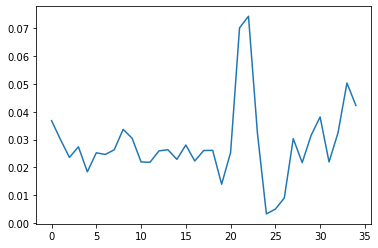

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', oob_score=True, random_state=8)
rfc.fit(data, labels)

print(rfc.oob_score_)
print(rfc.feature_importances_)
plt.plot(rfc.feature_importances_)

---
---
# **Logistic Regression**

0.675
[[-1.18024431 -0.44102865  0.96016224  0.67717907  0.20178578 -0.29176848
   0.26792096  0.08720698  1.64116603  0.07036817  0.18213727 -0.7250254
   0.49100063  0.54268701  0.17308286 -0.9132379   0.09496531  0.82677886
  -0.50935524 -0.25320465  0.56560106 -0.43855176 -0.32388748  0.46168525
   0.3374921   0.40525904 -0.13063152 -0.20273515  0.81306638 -0.27151511
   0.06960164  0.14903762 -0.49543434 -0.31873024  0.47158518]]


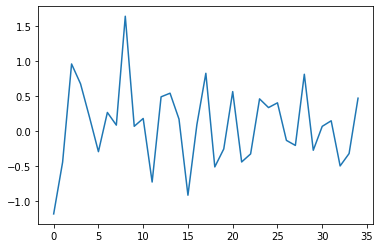

In [ ]:
lr = LogisticRegression(random_state=8)
lr.fit(train_x, train_y)

print(lr.score(test_x, test_y))
print(lr.coef_)
plt.plot(lr.coef_[0])

---
---
# **XGBoost**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.3, random_state=8)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(train_x, train_y)

XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

In [ ]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7166666666666667


---
---
# **KNearestNeighbors**

In [ ]:
max = 0
for k in range(1,140):

  kneigh = KNeighborsClassifier(n_neighbors=k, leaf_size=50)
  kneigh.fit(train_x, train_y)
  score = kneigh.score(test_x, test_y)
  if score > max:
    print("for k =", k, "score=",score)
    max = score

for k = 1 score= 0.7
for k = 3 score= 0.7666666666666667


---
---

# **Decision Tree Classifier**

In [ ]:
tree = DecisionTreeClassifier(max_depth=1000, min_samples_split=5, min_samples_leaf=5, max_features='auto', random_state=8)
tree.fit(train_x, train_y)

print(tree.score(test_x, test_y))

0.6833333333333333


---
---
# **Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(train_x, train_y)

print(nb.score(test_x, test_y)) # 0.35 == 0.65 ??

0.6
